In [1]:
import bs4 as bs
import urllib.request as url
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import heapq
from string import punctuation

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
article_text = """
Constems-AI
Andoid App Developer Intern
Noida
Easy Apply
Easy Apply
Key Responsibilities:
Develop and maintain Android applications.
Collaborate with cross-functional teams to design, develop, and test new features.
Ensure the performance, quality, and responsiveness of applications.
Identify and fix bugs, and improve the performance of existing applications.
Stay up-to-date with new trends, libraries, and technologies in Android development.
Requirements:
Currently pursuing or recently completed a degree in Computer Science, Software Engineering or a related field.
Knowledge of Java and/or Kotlin programming languages.
Understanding of Android SDK, Android Studio, and Android API levels.
Familiarity with RESTful APIs and JSON data format.
Strong analytical and problem-solving skills.
Ability to work in a team environment.
Excellent written and verbal communication skills.
Job Type: Internship
Contract length: 6 months
Pay: ₹10,000.00 per month
Schedule:
Day shift
...
The minimum salary is ₹10T and the max salary is ₹10T.
₹10T/mo (Employer est.)
Noida
"""



In [4]:
import re

# Remove square brackets and content within them
article_text = re.sub(r'\[.*?\]', '', article_text)

# Replace newlines with spaces and remove extra spaces
article_text = re.sub(r'\s+', ' ', article_text).strip()

print(article_text)


Constems-AI Andoid App Developer Intern Noida Easy Apply Easy Apply Key Responsibilities: Develop and maintain Android applications. Collaborate with cross-functional teams to design, develop, and test new features. Ensure the performance, quality, and responsiveness of applications. Identify and fix bugs, and improve the performance of existing applications. Stay up-to-date with new trends, libraries, and technologies in Android development. Requirements: Currently pursuing or recently completed a degree in Computer Science, Software Engineering or a related field. Knowledge of Java and/or Kotlin programming languages. Understanding of Android SDK, Android Studio, and Android API levels. Familiarity with RESTful APIs and JSON data format. Strong analytical and problem-solving skills. Ability to work in a team environment. Excellent written and verbal communication skills. Job Type: Internship Contract length: 6 months Pay: ₹10,000.00 per month Schedule: Day shift ... The minimum salar

In [5]:
# remove special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

In [6]:

sentence_list = nltk.sent_tokenize(article_text)

In [7]:
stopwords = nltk.corpus.stopwords.words('english')

In [8]:
word_frequencies = {}

for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords and word not in punctuation:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [9]:
word_frequencies


{'Constems': 1,
 'AI': 1,
 'Andoid': 1,
 'App': 1,
 'Developer': 1,
 'Intern': 1,
 'Noida': 2,
 'Easy': 2,
 'Apply': 2,
 'Key': 1,
 'Responsibilities': 1,
 'Develop': 1,
 'maintain': 1,
 'Android': 5,
 'applications': 3,
 'Collaborate': 1,
 'cross': 1,
 'functional': 1,
 'teams': 1,
 'design': 1,
 'develop': 1,
 'test': 1,
 'new': 2,
 'features': 1,
 'Ensure': 1,
 'performance': 2,
 'quality': 1,
 'responsiveness': 1,
 'Identify': 1,
 'fix': 1,
 'bugs': 1,
 'improve': 1,
 'existing': 1,
 'Stay': 1,
 'date': 1,
 'trends': 1,
 'libraries': 1,
 'technologies': 1,
 'development': 1,
 'Requirements': 1,
 'Currently': 1,
 'pursuing': 1,
 'recently': 1,
 'completed': 1,
 'degree': 1,
 'Computer': 1,
 'Science': 1,
 'Software': 1,
 'Engineering': 1,
 'related': 1,
 'field': 1,
 'Knowledge': 1,
 'Java': 1,
 'Kotlin': 1,
 'programming': 1,
 'languages': 1,
 'Understanding': 1,
 'SDK': 1,
 'Studio': 1,
 'API': 1,
 'levels': 1,
 'Familiarity': 1,
 'RESTful': 1,
 'APIs': 1,
 'JSON': 1,
 'data': 1,


In [10]:

maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

In [11]:

word_frequencies

{'Constems': 0.2,
 'AI': 0.2,
 'Andoid': 0.2,
 'App': 0.2,
 'Developer': 0.2,
 'Intern': 0.2,
 'Noida': 0.4,
 'Easy': 0.4,
 'Apply': 0.4,
 'Key': 0.2,
 'Responsibilities': 0.2,
 'Develop': 0.2,
 'maintain': 0.2,
 'Android': 1.0,
 'applications': 0.6,
 'Collaborate': 0.2,
 'cross': 0.2,
 'functional': 0.2,
 'teams': 0.2,
 'design': 0.2,
 'develop': 0.2,
 'test': 0.2,
 'new': 0.4,
 'features': 0.2,
 'Ensure': 0.2,
 'performance': 0.4,
 'quality': 0.2,
 'responsiveness': 0.2,
 'Identify': 0.2,
 'fix': 0.2,
 'bugs': 0.2,
 'improve': 0.2,
 'existing': 0.2,
 'Stay': 0.2,
 'date': 0.2,
 'trends': 0.2,
 'libraries': 0.2,
 'technologies': 0.2,
 'development': 0.2,
 'Requirements': 0.2,
 'Currently': 0.2,
 'pursuing': 0.2,
 'recently': 0.2,
 'completed': 0.2,
 'degree': 0.2,
 'Computer': 0.2,
 'Science': 0.2,
 'Software': 0.2,
 'Engineering': 0.2,
 'related': 0.2,
 'field': 0.2,
 'Knowledge': 0.2,
 'Java': 0.2,
 'Kotlin': 0.2,
 'programming': 0.2,
 'languages': 0.2,
 'Understanding': 0.2,
 'SDK'

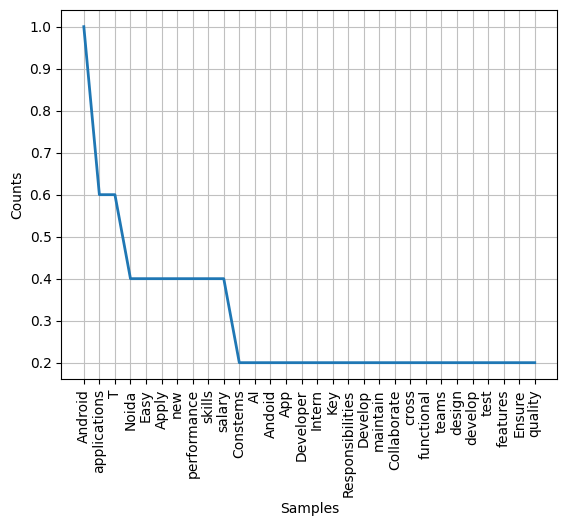

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [12]:
frequency_dist = nltk.FreqDist(word_frequencies)
frequency_dist.plot(30)

In [13]:
sentence_scores = {}

for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]


In [14]:
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)

In [15]:
summary

'Identify and fix bugs, and improve the performance of existing applications. Collaborate with cross-functional teams to design, develop, and test new features. Ensure the performance, quality, and responsiveness of applications. The minimum salary is ₹10T and the max salary is ₹10T. Stay up-to-date with new trends, libraries, and technologies in Android development. Requirements: Currently pursuing or recently completed a degree in Computer Science, Software Engineering or a related field. Constems-AI Andoid App Developer Intern Noida Easy Apply Easy Apply Key Responsibilities: Develop and maintain Android applications.'